## The network of authors who publish articles (Working Papers) on NBER
### Created by - Nikhil Kumar

### Import Packages

In [1]:
import pandas as pd 
import os 
import numpy as np 
import re
import string
import math
import networkx as nx
import matplotlib.pyplot as plt
from nltk.corpus import stopwords  
from nltk.tokenize import word_tokenize 
%matplotlib inline

In [2]:
path = r"C:\Users\nik596\Documents\GitHub\NBER/"

### Load Data on papers and authors

In [3]:
df = pd.read_csv(path + 'NBER_WP_long.csv')

In [4]:
df = df[df['year'].apply(lambda x: int(x) >= 1981 and int(x) <= 2021)]
df

,paper,count,paper_link,papermonth,papernumber,author,authorlink,authorposition,authoraffiliation,month,year,num_authors
0,""". . . and six hundred thousand men were dead.""",1,https://www.nber.org/papers/w9793,June 2003,9793,Herschel I. Grossman,/people/herschel_grossman,NaN,Brown University,June,2003,1
1,"""Aggregation Bias"" DOES Explain the PPP Puzzle",3,https://www.nber.org/papers/w11607,September 2005,11607,Morten O. Ravn,/people/morten_ravn,NaN,University College London,September,2005,4
2,"""Aggregation Bias"" DOES Explain the PPP Puzzle",1,https://www.nber.org/papers/w11607,September 2005,11607,Jean Imbs,/people/jean_imbs,NaN,Paris School of Economics,September,2005,4
3,"""Aggregation Bias"" DOES Explain the PPP Puzzle",4,https://www.nber.org/papers/w11607,September 2005,11607,Hélène Rey,/people/helene_rey,Research Associate,London Business School,September,2005,4
4,"""Aggregation Bias"" DOES Explain the PPP Puzzle",2,https://www.nber.org/papers/w11607,September 2005,11607,Haroon Mumtaz,/people/haroon_mumtaz,NaN,London Business School,September,2005,4
...,...,...,...,...,...,...,...,...,...,...,...,...
56592,“Nash-in-Nash” Bargaining: A Microfoundation f...,3,https://www.nber.org/papers/w20641,October 2014,20641,Robin S. Lee,/people/robin_lee,Research Associate,Harvard University,October,2014,3
56593,“Nash-in-Nash” Bargaining: A Microfoundation f...,2,https://www.nber.org/papers/w20641,October 2014,20641,Gautam Gowrisankaran,/people/gautam_gowrisankaran,Research Associate,Columbia University,October,2014,3
56594,"“Unusual, Unstable, Complicated, Unreliable an...",2,https://www.nber.org/papers/w29114,July 2021,29114,Catherine R. Schenk,/people/catherine_schenk,NaN,University of Oxford,July,2021,2
56595,"“Unusual, Unstable, Complicated, Unreliable an...",1,https://www.nber.org/papers/w29114,July 2021,29114,Michael D. Bordo,/people/michael_bordo,Research Associate,Rutgers University,July,2021,2


### Load Detailed Data on Papers, Authors and Paper Topics

In [5]:
df1 = pd.read_excel(path + "NBER_WP.xlsx")

In [6]:
new = df1["paper month"].str.split(" ", n = 1, expand = True) 
df1["month"]= new[0]  
df1["year"]= new[1]  
df1.drop(columns =["paper month"], inplace = True)
df1 = df1[df1['year'].apply(lambda x: int(x)>= 1981 and int(x) <= 2020)]
df1

,Unnamed: 0,paper,paper_link,paper number,paper topic 1,paper topic 2,paper topic 3,paper program 1,paper program 2,paper program 3,...,author position 16,author affiliation 16,author address 16,author 17,author link 17,author position 17,author affiliation 17,author address 17,month,year
0,0,School Finance Reform and the Distribution of ...,https://www.nber.org/papers/w22011,22011,Subnational Fiscal Issues,"Health, Education, and Welfare",Education,Children,Economics of Education,Labor Studies,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,February,2016
1,1,Labor Market Shocks and Retirement: Do Govern...,https://www.nber.org/papers/w12559,12559,Public Economics,National Fiscal Issues,Labor Economics,Economics of Aging,Labor Studies,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,October,2006
2,2,Market Fragmentation,https://www.nber.org/papers/w26828,26828,Microeconomics,Market Structure and Distribution,Economics of Information,Economic Fluctuations and Growth,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,March,2020
3,3,Do Prices Determine Vertical Integration?,https://www.nber.org/papers/w16118,16118,Microeconomics,Households and Firms,International Economics,Industrial Organization,International Trade and Investment,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,June,2010
4,4,The Physical State of the British Working Clas...,https://www.nber.org/papers/w1661,1661,Other,Labor Economics,NaN,Development of the American Economy,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,July,1985
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25245,25245,What Hinders Investment in the Aftermath of Fi...,https://www.nber.org/papers/w16528,16528,Macroeconomics,Business Cycles,International Economics,Economic Fluctuations and Growth,International Finance and Macroeconomics,International Trade and Investment,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,November,2010
25246,25246,International Portfolio Diversification and La...,https://www.nber.org/papers/w6382,6382,International Economics,International Finance,Financial Economics,Asset Pricing,International Finance and Macroeconomics,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,January,1998
25247,25247,Banks as Secret Keepers,https://www.nber.org/papers/w20255,20255,Microeconomics,Economics of Information,Macroeconomics,Corporate Finance,Economic Fluctuations and Growth,Monetary Economics,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,June,2014
25248,25248,Does Automatic Enrollment Increase Contributio...,https://www.nber.org/papers/w26263,26263,Labor Economics,Demography and Aging,Labor Supply and Demand,Economics of Aging,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,September,2019


##### Number of unique articles published between 1981 and 2020

In [7]:
len(set(df1['paper']))

23446

##### Number of unique authors who published between 1981 and 2020

In [8]:
len(set(df['author']))

14985

##### Find the set of unique authors

In [9]:
author_set = list(set(list(df['author'].unique())))

## Network of co-authors

In [10]:
adj = pd.DataFrame(columns = list(author_set), index = list(author_set)).fillna(0)

In [11]:
for row in df1.index:
    # for every paper in the dataset
    
    for i in range(1, 17, 1):
        # for every possible author of the paper
        
        focal = df1.loc[row, 'author ' + str(i)]
        for j in range(1, 17, 1):
            # for every possible author of the paper
            
            author = df1.loc[row, 'author ' + str(j)]
            
            # increase the number of papers authored by 'focal' with 'author' by 1
            if not(pd.isnull(focal)) and not(pd.isnull(author)):
                adj[focal][author] = adj[focal][author] + 1

In [12]:
adj

,Stijn Van Nieuwerburgh,Kerstin Holzheu,Long Hong,Bjoern Bruegemann,Paul J. Devereaux,Romain Rancière,Dirk Muir,Kelly Shue,Paul Novosad,Paul Niehaus,...,Igor Popov,Louis H. Ederington,Jennifer Wu,David F. Larcker,Daniel Sichel,Dena Bravata,Jie (Jack) He,Chiaki Moriguchi,Brian Duncan,Mariana Carrera
Stijn Van Nieuwerburgh,34,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Kerstin Holzheu,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Long Hong,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Bjoern Bruegemann,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Paul J. Devereaux,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Dena Bravata,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Jie (Jack) He,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
Chiaki Moriguchi,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,5,0,0
Brian Duncan,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,5,0


##### Number of papers published by each author

Mean =  3.555955955955956
Median =  1.0


(array([1.4313e+04, 4.6700e+02, 1.1700e+02, 4.5000e+01, 1.9000e+01,
        1.0000e+01, 8.0000e+00, 3.0000e+00, 2.0000e+00, 1.0000e+00]),
 array([  0.,  16.,  32.,  48.,  64.,  80.,  96., 112., 128., 144., 160.]),
 <BarContainer object of 10 artists>)

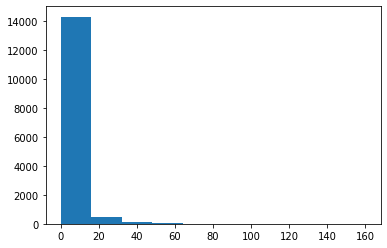

In [13]:
papers = pd.DataFrame(np.diag(adj), index=[adj.index], columns = ['count'])
print("Mean = ", np.mean(papers['count']))
print("Median = ", np.median(papers['count']))
plt.hist(papers['count'])

In [14]:
np.fill_diagonal(adj.values, 0)

In [15]:
adj.to_excel(r'C:\Users\nik596\Documents\GitHub\NBER-Author-Networks\NBER_adj_matrix.xlsx',engine='xlsxwriter', index=False)

FileSizeError: Filesize would require ZIP64 extensions. Use workbook.use_zip64().

In [ ]:
G = nx.from_pandas_adjacency(adj)
plt.figure(figsize = (50,50))
nx.draw(G, width = 5, node_size = 10)

In [ ]:
plt.savefig("C:\Users\nik596\Documents\GitHub\NBER-Author-Networks\network-graph.png")

##### Number of collaborators of each author

Mean =  4.420286953620287


(array([1.4005e+04, 7.1400e+02, 1.6700e+02, 5.7000e+01, 2.3000e+01,
        1.1000e+01, 2.0000e+00, 4.0000e+00, 0.0000e+00, 2.0000e+00]),
 array([  0. ,  12.1,  24.2,  36.3,  48.4,  60.5,  72.6,  84.7,  96.8,
        108.9, 121. ]),
 <BarContainer object of 10 artists>)

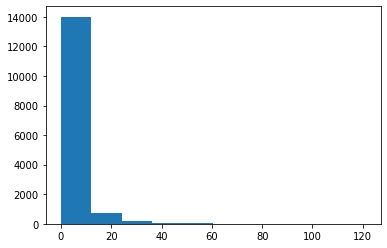

In [68]:
p = [x[1] for x in nx.degree(G)]
print("Mean = ", np.mean(p))
plt.hist(p)

##### How often do people who share a co-author also co-author?

(array([4189.,  951.,  702.,  876.,  504.,  423.,  459.,   56.,  116.,
        6709.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

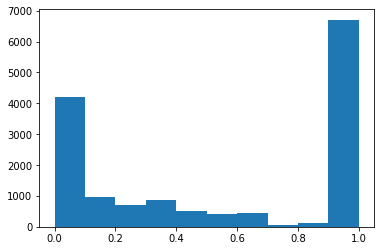

In [69]:
plt.hist(nx.clustering(G).values())

In [70]:
print("Average Clustering Coefficient = ", nx.average_clustering(G))
print("Transitivity = ", nx.transitivity(G))
# This means that there are significant number of authors ( > 50%) who have co-authors who also co-author (form triads) - high ACC
# However, when authors who have many co-authors, these co-authors are less likely to have collaborated - low Transitivity

Average Clustering Coefficient =  0.5495265265578176
Transitivity =  0.18306566477595865


##### Authors who are connected to each other through co-authors

In [71]:
# Largest Connected Component in the Network
largest_cc = max(nx.connected_components(G), key=len)
len(largest_cc)
# This forms about 90% of the authors

13303

##### Degree distribution of number of co-authors

In [72]:
p = [x for x in nx.degree(G)]
degrees = {k: v for k, v in sorted(p, key=lambda item: item[1], reverse=True)}
degree_values = sorted(set(degrees.values()))
histogram = [sum([x == i for x in degrees.values()])/float(nx.number_of_nodes(G)) for i in degree_values]

In [73]:
#sorted([x for x in G.degree()], key=lambda item: item[1], reverse=True)

### Preferential Attachment Model (Power Law)

Text(0, 0.5, 'fraction of all authors')

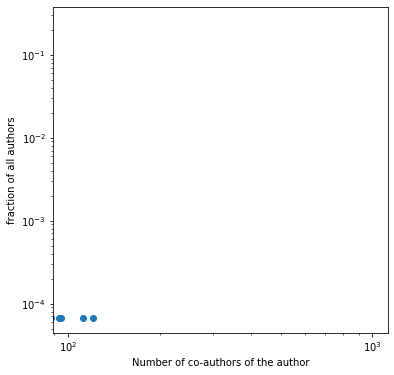

In [74]:
plt.figure(figsize = (6,6))
plt.scatter(degree_values, histogram)
plt.yscale("log")
plt.xscale("log")
plt.xlabel("Number of co-authors of the author")
plt.ylabel("fraction of all authors")

##### Regression

In [75]:
import numpy as np
import scipy
my_x = [np.log(item) for item in degree_values]
my_y = [np.log(item) for item in histogram]
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(my_x, my_y)
print("Preferntial attachment explains ", (r_value**2)*100, "% of the variation in degree distribution")
print("log(fraction of authors with n co-authors) = ", intercept, " + ", slope, " * n + error")

Preferntial attachment explains  nan % of the variation in degree distribution
log(fraction of authors with n co-authors) =  nan  +  nan  * n + error


C:\Users\nik596\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\nik596\appdata\local\programs\python\python37\lib\site-packages\numpy\lib\function_base.py:2536: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]


##### Average clustering coefficient vs Degree

Text(0, 0.5, 'Average Clustering Coefficient')

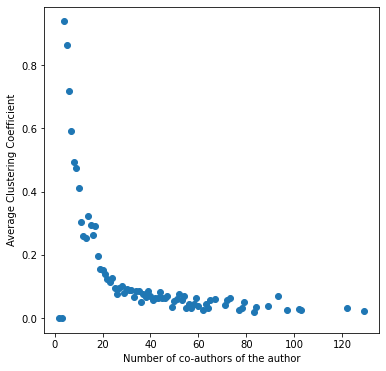

In [23]:
c = nx.clustering(G)
d = {k: v for k, v in p}
x = pd.DataFrame.from_dict([c, d]).T.rename(columns = {0: 'clustering', 1:'degree'})
y = []
z = []
for t, grp in x.groupby('degree'):
    z.append(sum(grp['clustering'])/len(grp))
    y.append(t)

plt.figure(figsize = (6,6))
plt.scatter(y,z)
plt.xlabel("Number of co-authors of the author")
plt.ylabel("Average Clustering Coefficient")

##### Cumulative pattern of the power law over the years

In [24]:
clus = []
tra = []
y = []
num = []
for yr in range(1981, 2021, 1):
    df80 = df1[df1['year'].apply(lambda x: int(x)) <= yr]
    temp80 = df[df['year'].apply(lambda x: int(x)) <= yr]
    author_set80 = list(set(list(temp80['author'].unique())))
    adj80 = pd.DataFrame(columns = list(author_set80), index = list(author_set80)).fillna(0)
    for row in df80.index:
        # for every paper in the dataset
    
        for i in range(1, 17, 1):
            # for every possible author of the paper
        
            focal = df80.loc[row, 'author ' + str(i)]
            for j in range(1, 17, 1):
                # for every possible author of the paper
            
                author = df80.loc[row, 'author ' + str(j)]
            
                # increase the number of papers authored by 'focal' with 'author' by 1
                if not(pd.isnull(focal)) and not(pd.isnull(author)):
                    adj80[focal][author] = adj80[focal][author] + 1
    
    y.append(yr)
    num.append(len(adj80))
    G80 = nx.from_pandas_adjacency(adj80)
    clus.append(nx.average_clustering(G80))
    tra.append(nx.transitivity(G80))

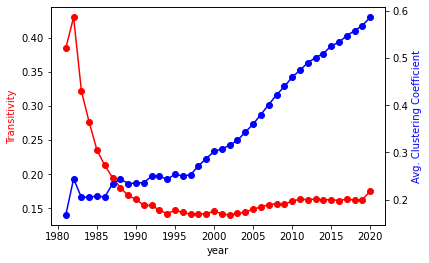

In [25]:
fig,ax = plt.subplots()
ax.plot(y, tra, color="red", marker="o")
ax.set_xlabel("year")
ax.set_ylabel("Transitivity", color="red")
ax2=ax.twinx()
ax2.plot(y, clus, color="blue",marker="o")
ax2.set_ylabel("Avg. Clustering Coefficient", color="blue")
plt.show()

## Network of Institutions of these authors

In [26]:
df['authoraffiliation'] = df['authoraffiliation'].apply(lambda x: x.split('\n')[0].strip() if not(pd.isnull(x)) else x)
inst_set = list(set(list(df['authoraffiliation'].unique())))
inst_set.remove(np.nan)

##### Number of unique institutions to which authors who published were affiliated between 1981 and 2020

In [27]:
len(inst_set)

2873

In [28]:
adj_inst = pd.DataFrame(columns = list(inst_set), index = list(inst_set)).fillna(0)

In [29]:
for row in df1.index:
    for i in range(1, 17, 1):
        focal = df1.loc[row, 'author affiliation ' + str(i)]
        #foc = ' '.join(word for word in [w for w in word_tokenize(focal) if not w in set(stopwords.words('english'))])
        for j in range(1, 17, 1):
            author = df1.loc[row, 'author affiliation ' + str(j)]
            #aut = ' '.join(word for word in [w for w in word_tokenize(author) if not w in set(stopwords.words('english'))])
            if not(pd.isnull(focal)) and not(pd.isnull(author)):
                adj_inst[focal.split('\n')[0].strip()][author.split('\n')[0].strip()] = adj_inst[focal.split('\n')[0].strip()][author.split('\n')[0].strip()] + 1

In [30]:
adj_inst

,Instituto de Investigacion Tecnologica (IIT),National Economic Research Associates,"Economics Dept., University of Minnesota",Harvard T.H. Chan School of Public Health,Beacon Hill Institute at Suffolk University,"Gregory Chow Center for Economic Research, Xiamen University",Bridge Clinical,Children's Investment Fund Foundation,Center for the Economics of Human Development - University of Chicago,United BioSource Corporation,...,MIT Sloan School of Management,Wichita State University,princeton University,Swedish International Development Cooperation Agen,University Capital Strategies Group,Interamerican Development Bank,Belmont University,Geisinger Clinic,University of Alaska Anchorage,"Pandora Media, Inc"
Instituto de Investigacion Tecnologica (IIT),2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
National Economic Research Associates,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"Economics Dept., University of Minnesota",0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Harvard T.H. Chan School of Public Health,0,0,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Beacon Hill Institute at Suffolk University,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Interamerican Development Bank,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
Belmont University,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2,0,0,0
Geisinger Clinic,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,3,0,0
University of Alaska Anchorage,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,12,0


##### Number of papers published by authors affiliated to each institution

Mean =  26.23564218586843
Median =  2.0


(array([2.853e+03, 9.000e+00, 5.000e+00, 2.000e+00, 2.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([1.000e+00, 6.670e+02, 1.333e+03, 1.999e+03, 2.665e+03, 3.331e+03,
        3.997e+03, 4.663e+03, 5.329e+03, 5.995e+03, 6.661e+03]),
 <a list of 10 Patch objects>)

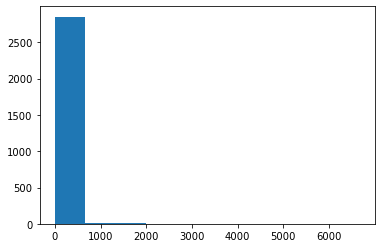

In [31]:
papers = pd.DataFrame(np.diag(adj_inst), index=[adj_inst.index], columns = ['count'])
print("Mean = ", np.mean(papers['count']))
print("Median = ", np.median(papers['count']))
plt.hist(papers['count'])

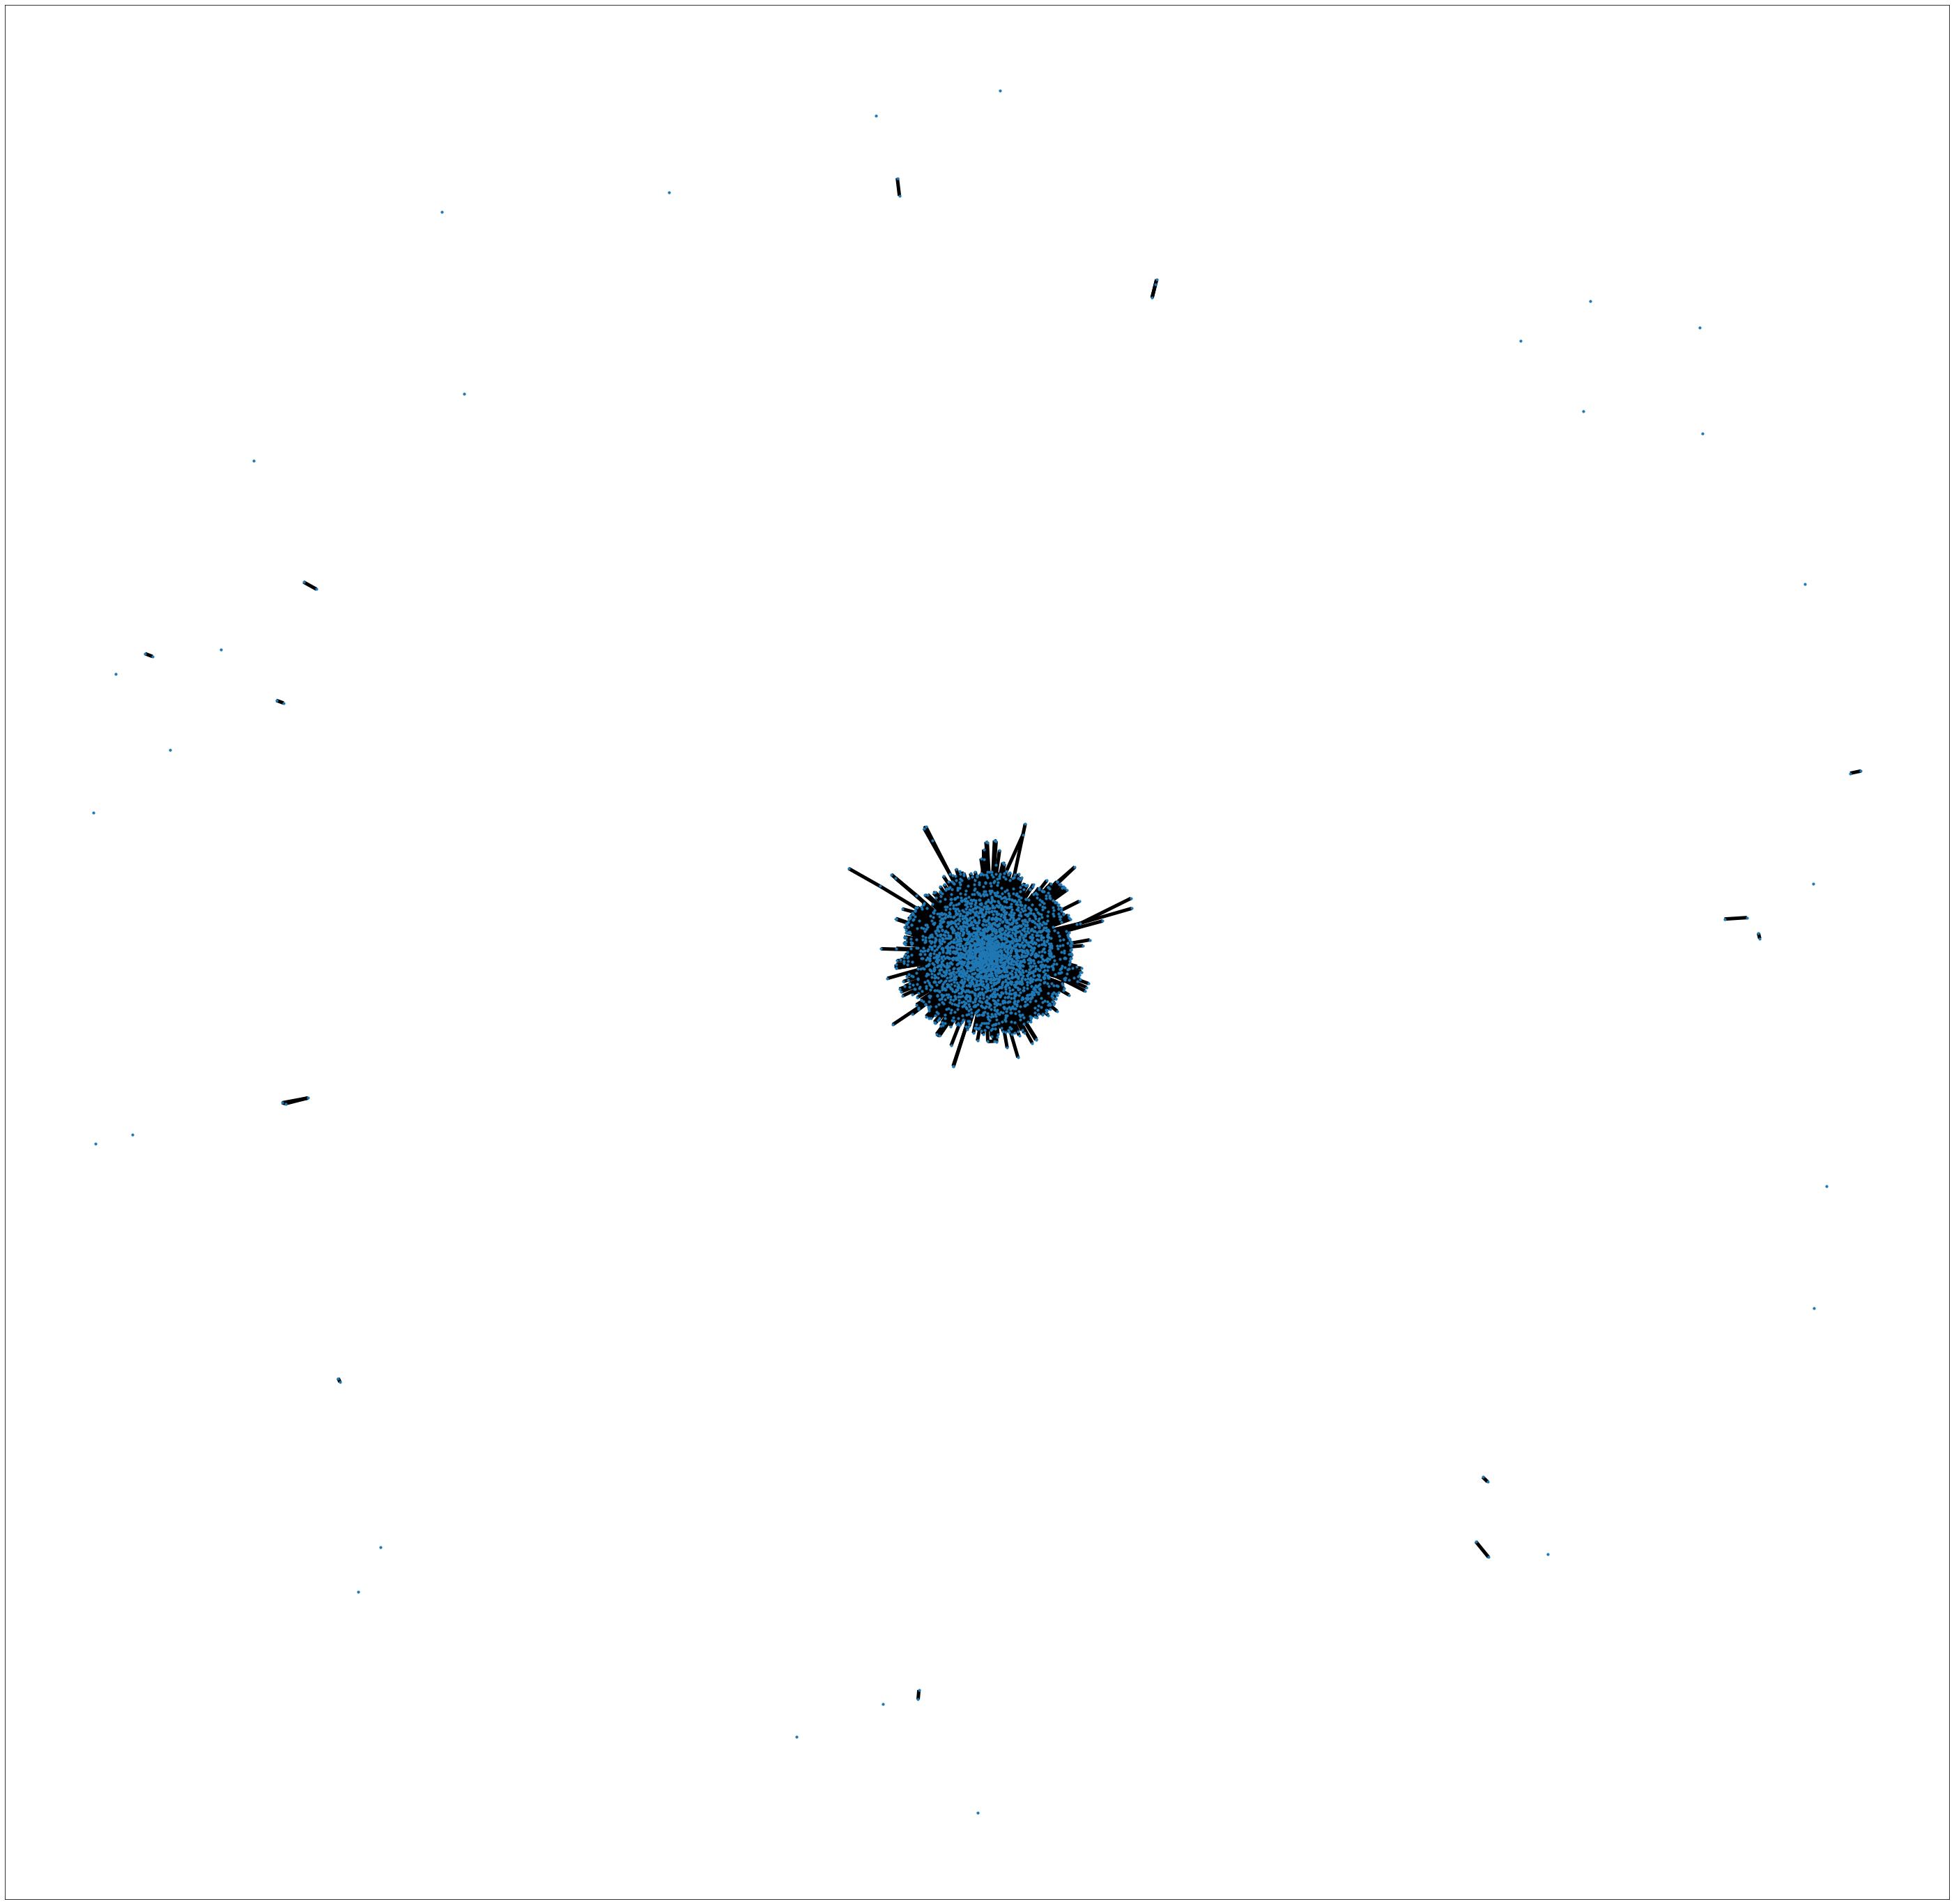

In [32]:
G1 = nx.from_pandas_adjacency(adj_inst)
plt.figure(figsize = (50,50))
nx.draw_networkx(G1, with_labels=False, width = 5, node_size = 10)

##### Number of institutions that any author at an institution has collaborated with

Mean =  12.20536025060912


(array([2.783e+03, 4.800e+01, 1.900e+01, 7.000e+00, 8.000e+00, 1.000e+00,
        2.000e+00, 3.000e+00, 1.000e+00, 1.000e+00]),
 array([  2. ,  61.1, 120.2, 179.3, 238.4, 297.5, 356.6, 415.7, 474.8,
        533.9, 593. ]),
 <a list of 10 Patch objects>)

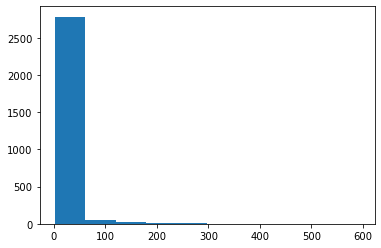

In [33]:
p = [x[1] for x in nx.degree(G1)]
print("Mean = ", np.mean(p))
plt.hist(p)

##### How often do authors at institutions, who share a co-author at another institution, also co-author?

(array([ 564.,   45.,  106.,  168.,  162.,  204.,  207.,   40.,   83.,
        1294.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

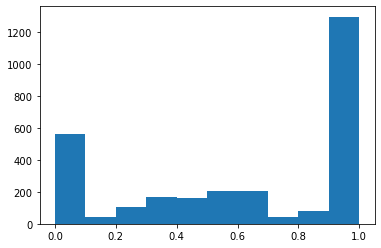

In [34]:
plt.hist(nx.clustering(G1).values())

In [35]:
print("Average Clustering Coefficient = ", nx.average_clustering(G1))
print("Transitivity = ", nx.transitivity(G1))
# This means that there are significant number of authors ( > 50%) who have co-authors who also co-author (form triads) - high ACC
# However, when authors who have many co-authors, these co-authors are less likely to have collaborated - low Transitivitynx.average_clustering(G1)

Average Clustering Coefficient =  0.6278104507286759
Transitivity =  0.12733709131636498


##### Institutions who are connected to each other through co-authors

In [44]:
# Largest Connected Component in the Network
largest_cc = max(nx.connected_components(G1), key=len)
len(largest_cc)
# This forms about 98% of the authors

2818

##### Number of co-authors in institutions different the author's institution

In [37]:
p1 = [x for x in nx.degree(G1)]
degrees1 = {k: v for k, v in sorted(p1, key=lambda item: item[1], reverse=True)}
degree_values1 = sorted(set(degrees1.values()))
histogram1 = [sum([x == i for x in degrees1.values()])/float(nx.number_of_nodes(G1)) for i in degree_values1]

In [38]:
sorted([x for x in G1.degree()], key=lambda item: item[1], reverse=True)

[('Harvard University', 593),
 ('University of Chicago', 512),
 ('Columbia University', 427),
 ('Stanford University', 426),
 ('Massachusetts Institute of Technology', 422),
 ('University of California, Berkeley', 411),
 ('University of Pennsylvania', 380),
 ('Yale University', 343),
 ('Princeton University', 297),
 ('New York University', 293),
 ('Northwestern University', 270),
 ('University of Michigan', 266),
 ('University of Maryland', 260),
 ('Cornell University', 249),
 ('Boston University', 247),
 ('Duke University', 242),
 ('London School of Economics', 223),
 ('University of California, Los Angeles', 218),
 ('Dartmouth College', 212),
 ('University of Southern California', 196),
 ('Johns Hopkins University', 196),
 ('University of California, San Diego', 191),
 ('University of California, Davis', 184),
 ('Brown University', 166),
 ('University of Virginia', 166),
 ('The Ohio State University', 161),
 ('University of Toronto', 161),
 ('Georgetown University', 150),
 ('Universi

## Preferential Attachment Model (Power Law)

Text(0, 0.5, 'fraction of all institutions')

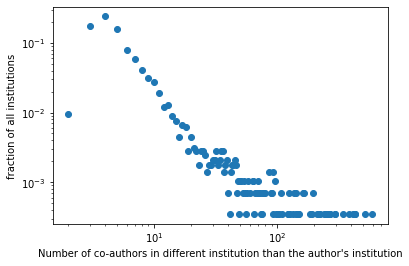

In [39]:
plt.scatter(degree_values1, histogram1)
plt.yscale("log")
plt.xscale("log")
plt.xlabel("Number of co-authors in different institution than the author's institution")
plt.ylabel("fraction of all institutions")

##### Regression

In [40]:
my_x = [np.log(item) for item in degree_values1]
my_y = [np.log(item) for item in histogram1]
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(my_x, my_y)
print("Preferntial attachment explains ", (r_value**2)*100, "% of the variation in degree distribution")
print("log(fraction of authors with n co-authors) = ", intercept, " + ", slope, " * n + error")

Preferntial attachment explains  77.68007265412895 % of the variation in degree distribution
log(fraction of authors with n co-authors) =  -2.0323812200264237  +  -1.1371637556471899  * n + error


##### Average clustering coefficient vs Degree

Text(0, 0.5, 'Average Clustering Coefficient')

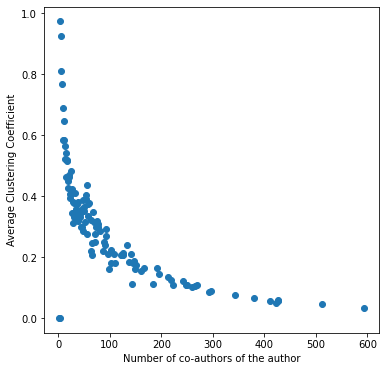

In [41]:
c = nx.clustering(G1)
d = {k: v for k, v in p1}
x = pd.DataFrame.from_dict([c, d]).T.rename(columns = {0: 'clustering', 1:'degree'})
y = []
z = []
for t, grp in x.groupby('degree'):
    z.append(sum(grp['clustering'])/len(grp))
    y.append(t)
plt.figure(figsize = (6,6))
plt.scatter(y,z)
plt.xlabel("Number of co-authors of the author")
plt.ylabel("Average Clustering Coefficient")

##### Cumulative pattern of the power law over the years

In [42]:
clus = []
tra = []
y = []
num = []
for yr in range(1981, 2021, 1):
    df80 = df1[df1['year'].apply(lambda x: int(x)) <= yr]
    temp80 = df[df['year'].apply(lambda x: int(x)) <= yr]
    author_set80 = list(set([x for x in temp80['authoraffiliation'].unique() if not(pd.isnull(x))]))
    adj80 = pd.DataFrame(columns = list(author_set80), index = list(author_set80)).fillna(0)
    for row in df80.index:
        # for every paper in the dataset
    
        for i in range(1, 17, 1):
            # for every possible author of the paper
        
            focal = df80.loc[row, 'author affiliation ' + str(i)]
            for j in range(1, 17, 1):
                # for every possible author of the paper
            
                author = df80.loc[row, 'author affiliation ' + str(j)]
            
                # increase the number of papers authored by 'focal' with 'author aiifiliation ' by 1
                if not(pd.isnull(focal)) and not(pd.isnull(author)):
                    try:
                        adj80[focal][author] = adj80[focal][author] + 1
                    except:
                        focal = focal.split('\r')[0]
                        author = author.split('\r')[0]
                        adj80[focal][author] = adj80[focal][author] + 1
                    
    
    y.append(yr)
    num.append(len(adj80))
    G80 = nx.from_pandas_adjacency(adj80)
    clus.append(nx.average_clustering(G80))
    tra.append(nx.transitivity(G80))

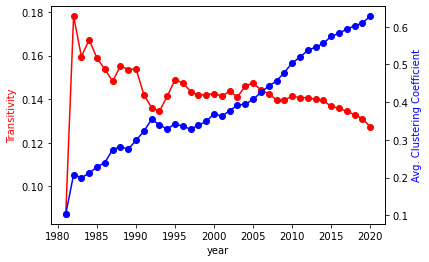

In [43]:
fig,ax = plt.subplots()
ax.plot(y, tra, color="red", marker="o")
ax.set_xlabel("year")
ax.set_ylabel("Transitivity", color="red")
ax2=ax.twinx()
ax2.plot(y, clus, color="blue",marker="o")
ax2.set_ylabel("Avg. Clustering Coefficient", color="blue")
plt.show()